In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("revised-2_employee_salaries_2021_12_headcount_salary.csv")

In [4]:
df.dtypes

FIRST_NAME           object
LAST_NAME            object
DEPARTMENT           object
JOB_TITLE            object
ELECTED_OFFICIAL      int64
DATE_STARTED         object
SEX                  object
ETHNICITY            object
ORIG_START           object
DATE_TERM            object
PAY_STATUS           object
ANNUAL_SALARY       float64
REGULAR_PAY         float64
OVERTIME_PAY        float64
INCENTIVE_PAY       float64
GROSS_PAY           float64
dtype: object

In [5]:
df.shape

(6373, 16)

# values outside interquartile range(25% to 75%) is called outlier

In [6]:
df.describe()

,ELECTED_OFFICIAL,ANNUAL_SALARY,REGULAR_PAY,OVERTIME_PAY,INCENTIVE_PAY,GROSS_PAY
count,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000
mean,0.000785,53613.230441,46496.806430,4708.267389,270.639950,51475.713769
std,0.028001,21924.660786,27653.269006,9438.036990,731.420016,31737.295120
min,0.000000,5666.960000,0.000000,-44.190000,-1000.000000,45.620000
25%,0.000000,39800.380000,31661.210000,0.000000,100.000000,33289.020000
50%,0.000000,47259.470000,44025.570000,536.360000,100.000000,47705.500000
75%,0.000000,64116.000000,59740.160000,4657.290000,225.000000,68159.600000
max,1.000000,254999.470000,255000.170000,106858.060000,9395.270000,255225.170000


In [7]:
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# Splitting numerical columns

In [8]:
df_num=df.select_dtypes(include=[np.number])

In [9]:
df_num.columns

Index(['ELECTED_OFFICIAL', 'ANNUAL_SALARY', 'REGULAR_PAY', 'OVERTIME_PAY',
       'INCENTIVE_PAY', 'GROSS_PAY'],
      dtype='object')

In [10]:
df_num.isnull().sum()

ELECTED_OFFICIAL    0
ANNUAL_SALARY       0
REGULAR_PAY         0
OVERTIME_PAY        0
INCENTIVE_PAY       0
GROSS_PAY           0
dtype: int64

# splitting categorical columns

In [11]:
df_cat=df.select_dtypes(include=['object']) 

In [12]:
df_cat.columns

Index(['FIRST_NAME', 'LAST_NAME', 'DEPARTMENT', 'JOB_TITLE', 'DATE_STARTED',
       'SEX', 'ETHNICITY', 'ORIG_START', 'DATE_TERM', 'PAY_STATUS'],
      dtype='object')

In [53]:
df_cat["FIRST_NAME"].unique()

array(['CATHERINE', 'JOY M', 'KEVIN J', ..., 'STANLEY J', 'ILAN',
       'JEFFREY M.'], dtype=object)

# Outlier for numerical columns

{'whiskers': [<matplotlib.lines.Line2D at 0x125922710>,
 'caps': [<matplotlib.lines.Line2D at 0x125b8f390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1259235d0>],
 'medians': [<matplotlib.lines.Line2D at 0x125b9f010>],
 'fliers': [<matplotlib.lines.Line2D at 0x125b9f990>],
 'means': []}

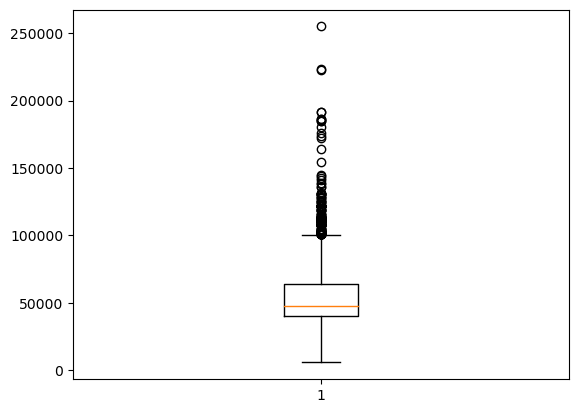

In [13]:
plt.boxplot(df_num["ANNUAL_SALARY"])

In [14]:
df_num["ANNUAL_SALARY"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     32619.60
0.25     39800.38
0.50     47259.47
0.75     64116.00
1.00    254999.47
Name: ANNUAL_SALARY, dtype: float64

In [79]:
df_num.shape

(6373, 6)

In [15]:
df_1=df_num[(df_num["ANNUAL_SALARY"] >=39800.38) & (df_num["ANNUAL_SALARY"] <=64116.00)]

In [16]:
df_1.shape

(3193, 6)

{'whiskers': [<matplotlib.lines.Line2D at 0x125c8fed0>,
 'caps': [<matplotlib.lines.Line2D at 0x125c9d710>,
 'boxes': [<matplotlib.lines.Line2D at 0x125c8f310>],
 'medians': [<matplotlib.lines.Line2D at 0x125c9eb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x125c9f110>],
 'means': []}

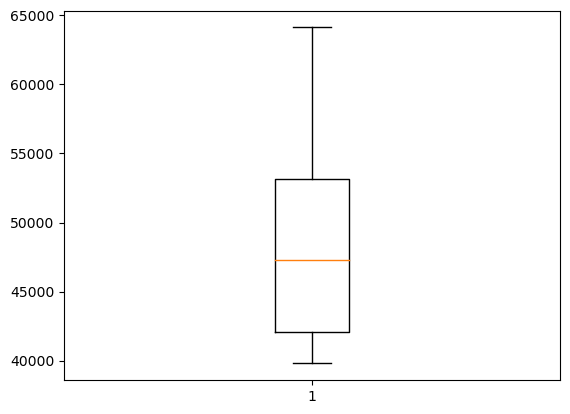

In [17]:
plt.boxplot(df_1["ANNUAL_SALARY"])

{'whiskers': [<matplotlib.lines.Line2D at 0x125d111d0>,
 'caps': [<matplotlib.lines.Line2D at 0x125d12890>,
 'boxes': [<matplotlib.lines.Line2D at 0x125d10650>],
 'medians': [<matplotlib.lines.Line2D at 0x125d13fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x125d20ad0>],
 'means': []}

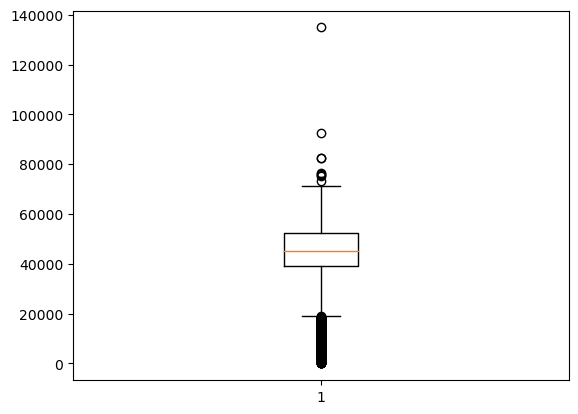

In [18]:
plt.boxplot(df_1["REGULAR_PAY"])

In [19]:
df_1["REGULAR_PAY"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     19096.35
0.25     38938.50
0.50     44975.90
0.75     52244.46
1.00    134909.02
Name: REGULAR_PAY, dtype: float64

In [20]:
df_2=df_1[(df_1["REGULAR_PAY"] >=38938.50) & (df_1["REGULAR_PAY"] <=52244.46)]

In [21]:
df_2.shape

(1600, 6)

{'whiskers': [<matplotlib.lines.Line2D at 0x125d79950>,
 'caps': [<matplotlib.lines.Line2D at 0x125d7b110>,
 'boxes': [<matplotlib.lines.Line2D at 0x125d78d90>],
 'medians': [<matplotlib.lines.Line2D at 0x125d88510>],
 'fliers': [<matplotlib.lines.Line2D at 0x125d58ed0>],
 'means': []}

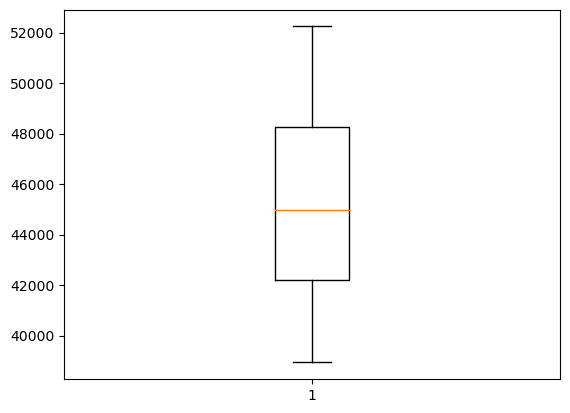

In [22]:
plt.boxplot(df_2["REGULAR_PAY"])

{'whiskers': [<matplotlib.lines.Line2D at 0x125d94dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x125df0b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x125ddf510>],
 'medians': [<matplotlib.lines.Line2D at 0x125df21d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x125df2bd0>],
 'means': []}

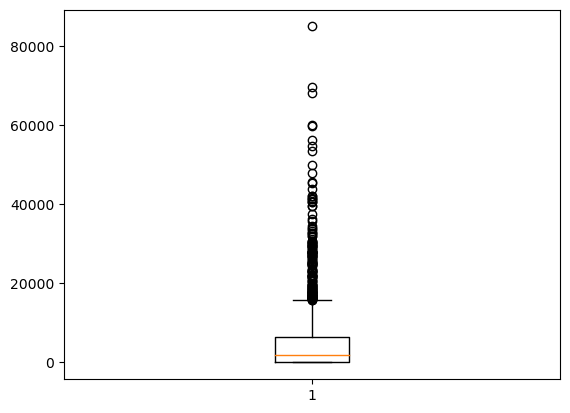

In [23]:
plt.boxplot(df_2["OVERTIME_PAY"])

In [24]:
df_2["OVERTIME_PAY"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10        0.0000
0.25        0.0000
0.50     1861.4150
0.75     6303.4575
1.00    84905.7900
Name: OVERTIME_PAY, dtype: float64

In [25]:
df_3=df_2[(df_2["OVERTIME_PAY"] >=0.0000) & (df_2["OVERTIME_PAY"] <=6303.4575)]

In [26]:
df_3.shape

(1199, 6)

{'whiskers': [<matplotlib.lines.Line2D at 0x125e51190>,
 'caps': [<matplotlib.lines.Line2D at 0x125e52890>,
 'boxes': [<matplotlib.lines.Line2D at 0x125e50650>],
 'medians': [<matplotlib.lines.Line2D at 0x125e53f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x125bc9d50>],
 'means': []}

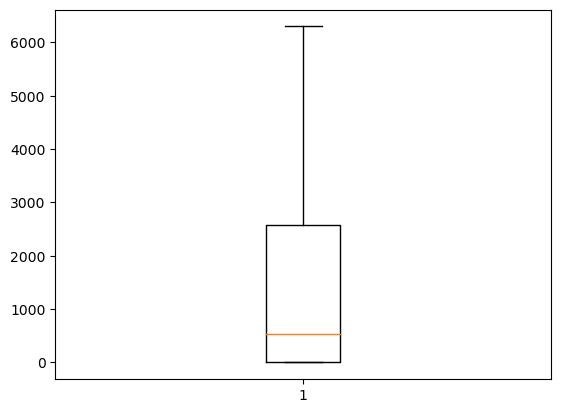

In [27]:
plt.boxplot(df_3["OVERTIME_PAY"])

{'whiskers': [<matplotlib.lines.Line2D at 0x125cc7350>,
 'caps': [<matplotlib.lines.Line2D at 0x125ec0b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x125eb6850>],
 'medians': [<matplotlib.lines.Line2D at 0x125ec21d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x125eb7e10>],
 'means': []}

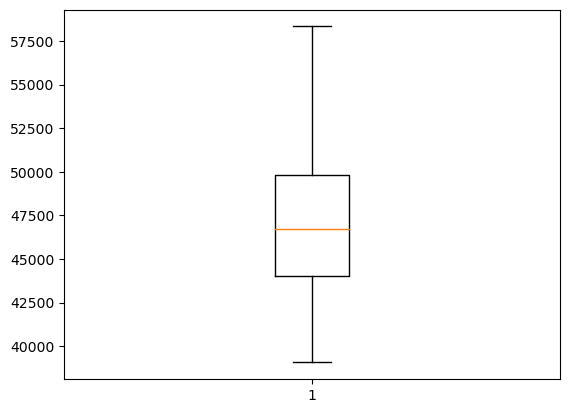

In [28]:
plt.boxplot(df_3["GROSS_PAY"])

{'whiskers': [<matplotlib.lines.Line2D at 0x125f2a150>,
 'caps': [<matplotlib.lines.Line2D at 0x125f2b790>,
 'boxes': [<matplotlib.lines.Line2D at 0x125f29690>],
 'medians': [<matplotlib.lines.Line2D at 0x125f38c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x125f39610>],
 'means': []}

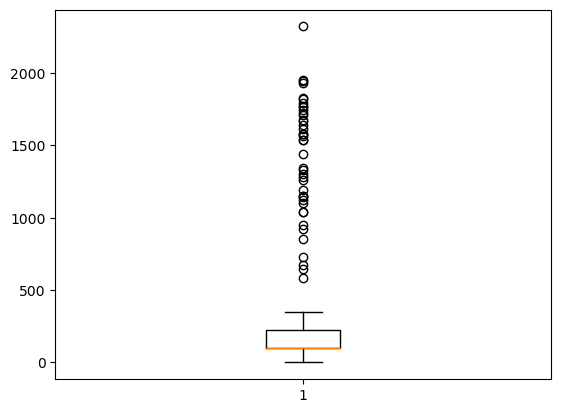

In [29]:
plt.boxplot(df_3["INCENTIVE_PAY"])

In [30]:
df_3["INCENTIVE_PAY"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     100.00
0.25     100.00
0.50     100.00
0.75     225.00
1.00    2321.77
Name: INCENTIVE_PAY, dtype: float64

In [31]:
df_4=df_3[(df_3["INCENTIVE_PAY"] >=100.00) & (df_3["INCENTIVE_PAY"] <=225.00)]

In [32]:
df_4.shape

(1099, 6)

{'whiskers': [<matplotlib.lines.Line2D at 0x125f879d0>,
 'caps': [<matplotlib.lines.Line2D at 0x125f99350>,
 'boxes': [<matplotlib.lines.Line2D at 0x125f86dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x125f9a510>],
 'fliers': [<matplotlib.lines.Line2D at 0x125f98d10>],
 'means': []}

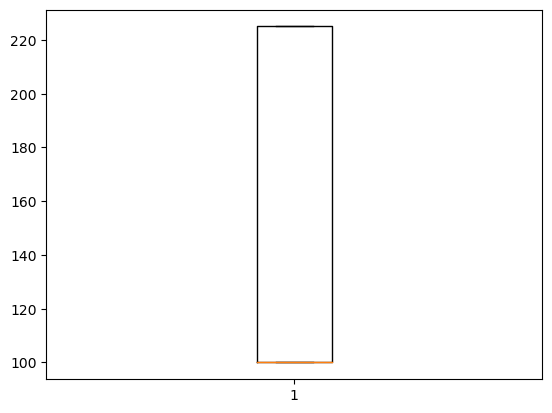

In [33]:
plt.boxplot(df_4["INCENTIVE_PAY"])

{'whiskers': [<matplotlib.lines.Line2D at 0x125fbbe50>,
 'caps': [<matplotlib.lines.Line2D at 0x126005e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x125ff4210>],
 'medians': [<matplotlib.lines.Line2D at 0x126007250>],
 'fliers': [<matplotlib.lines.Line2D at 0x126007d90>],
 'means': []}

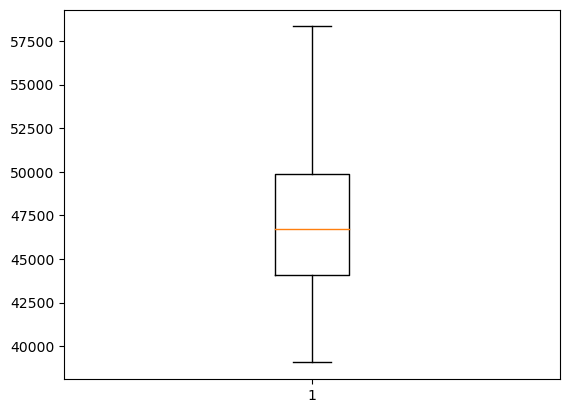

In [34]:
plt.boxplot(df_4["GROSS_PAY"])

In [35]:
df_4.isnull().sum()

ELECTED_OFFICIAL    0
ANNUAL_SALARY       0
REGULAR_PAY         0
OVERTIME_PAY        0
INCENTIVE_PAY       0
GROSS_PAY           0
dtype: int64

In [36]:
df_4.head()

,ELECTED_OFFICIAL,ANNUAL_SALARY,REGULAR_PAY,OVERTIME_PAY,INCENTIVE_PAY,GROSS_PAY
1,0,40761.76,44546.71,2959.17,125.0,47630.88
4,0,49844.50,49844.52,527.20,225.0,50596.72
9,0,42005.18,46757.40,4735.48,100.0,51592.88
14,0,42005.18,46628.42,4450.44,225.0,51303.86
16,0,42864.43,42752.10,0.00,100.0,42852.10


In [105]:
df_4.corr()

,ELECTED_OFFICIAL,ANNUAL_SALARY,REGULAR_PAY,OVERTIME_PAY,INCENTIVE_PAY,GROSS_PAY
ELECTED_OFFICIAL,NaN,NaN,NaN,NaN,NaN,NaN
ANNUAL_SALARY,NaN,1.000000,0.649211,-0.207913,-0.062359,0.515088
REGULAR_PAY,NaN,0.649211,1.000000,-0.139169,-0.083443,0.879987
OVERTIME_PAY,NaN,-0.207913,-0.139169,1.000000,0.158631,0.347652
INCENTIVE_PAY,NaN,-0.062359,-0.083443,0.158631,1.000000,0.012503
GROSS_PAY,NaN,0.515088,0.879987,0.347652,0.012503,1.000000


# Scaling for numerical columns

In [37]:
from sklearn import preprocessing

In [38]:
mm_scaler = preprocessing.MinMaxScaler()

In [39]:
df4_num_mm =mm_scaler.fit_transform(df_4)

In [40]:
df4_num_mm

array([[0.        , 0.03953755, 0.42148105, 0.4697304 , 0.2       ,
        0.44474311],
       [0.        , 0.41307275, 0.81963421, 0.08368626, 1.        ,
        0.59870347],
       [0.        , 0.09067423, 0.58762389, 0.7516969 , 0.        ,
        0.65041534],
       ...,
       [0.        , 0.26251932, 0.55274103, 0.26301963, 0.        ,
        0.46651052],
       [0.        , 0.1392792 , 0.3170241 , 0.        , 0.        ,
        0.21767982],
       [0.        , 0.09067423, 0.53259742, 0.57197304, 0.        ,
        0.55363259]])

# imputations using mode for categorical column

In [41]:
df_cat.isnull().sum()

FIRST_NAME         1
LAST_NAME          0
DEPARTMENT         0
JOB_TITLE          0
DATE_STARTED       0
SEX                0
ETHNICITY          0
ORIG_START         0
DATE_TERM       5095
PAY_STATUS         0
dtype: int64

In [42]:
df_cat.drop(["DATE_TERM"],axis=1,inplace=True)

In [43]:
df_cat['FIRST_NAME'].fillna(df_cat['FIRST_NAME'].value_counts().idxmax(),inplace=True)

In [44]:
df_cat.isnull().sum()

FIRST_NAME      0
LAST_NAME       0
DEPARTMENT      0
JOB_TITLE       0
DATE_STARTED    0
SEX             0
ETHNICITY       0
ORIG_START      0
PAY_STATUS      0
dtype: int64

# Label Encoding for categorical columns

In [45]:
le=preprocessing.LabelEncoder()

In [46]:
df2_cat_e =df_cat.apply(le.fit_transform)

In [47]:
df2_cat_e

,FIRST_NAME,LAST_NAME,DEPARTMENT,JOB_TITLE,DATE_STARTED,SEX,ETHNICITY,ORIG_START,PAY_STATUS
0,631,0,19,718,1095,0,2,1509,0
1,1914,1,19,300,671,0,5,635,0
2,2134,1,11,487,1278,1,5,1177,0
3,1638,2,27,243,1230,0,2,1121,1
4,1422,3,0,663,607,0,2,1148,0
...,...,...,...,...,...,...,...,...,...
6368,3510,4203,19,593,783,1,5,474,0
6369,1490,4204,9,376,299,1,5,270,0
6370,1704,4205,9,152,385,1,5,351,0
6371,2602,4206,24,40,1170,0,5,1049,0


In [48]:
df = pd.DataFrame(df4_num_mm, columns = ['ELECTED_OFFICIAL','ANNUAL_SALARY', 'REGULAR_PAY', 'OVERTIME_PAY',
       'INCENTIVE_PAY', 'GROSS_PAY'])

In [58]:
df_cat_filter = df2_cat_e.loc[df.index.values,:]

# concatenate those numerical and categorical columns

In [59]:
df_m = pd.concat([df,df_cat_filter],axis=1)

In [63]:
df_m.head()

,ELECTED_OFFICIAL,ANNUAL_SALARY,REGULAR_PAY,OVERTIME_PAY,INCENTIVE_PAY,GROSS_PAY,FIRST_NAME,LAST_NAME,DEPARTMENT,JOB_TITLE,DATE_STARTED,SEX,ETHNICITY,ORIG_START,PAY_STATUS
0,0.0,0.039538,0.421481,0.469730,0.2,0.444743,631,0,19,718,1095,0,2,1509,0
1,0.0,0.413073,0.819634,0.083686,1.0,0.598703,1914,1,19,300,671,0,5,635,0
2,0.0,0.090674,0.587624,0.751697,0.0,0.650415,2134,1,11,487,1278,1,5,1177,0
3,0.0,0.090674,0.577930,0.706450,1.0,0.635412,1638,2,27,243,1230,0,2,1121,1
4,0.0,0.126012,0.286608,0.000000,0.0,0.196671,1422,3,0,663,607,0,2,1148,0


In [64]:
df_m.isnull().sum()

ELECTED_OFFICIAL    0
ANNUAL_SALARY       0
REGULAR_PAY         0
OVERTIME_PAY        0
INCENTIVE_PAY       0
GROSS_PAY           0
FIRST_NAME          0
LAST_NAME           0
DEPARTMENT          0
JOB_TITLE           0
DATE_STARTED        0
SEX                 0
ETHNICITY           0
ORIG_START          0
PAY_STATUS          0
dtype: int64

# Modeling

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
Linreg=LinearRegression()

In [69]:
X1=df_m.drop(["ANNUAL_SALARY"],axis=1)

In [70]:
y=df_m["ANNUAL_SALARY"]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3)

In [73]:
LM=Linreg.fit(X_train,y_train)

In [74]:
LM.score(X_train,y_train)

0.4548945036254559

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
DecTree=DecisionTreeRegressor()

In [77]:
dt_M=DecTree.fit(X_train,y_train)

In [78]:
dt_M.score(X_train,y_train)

1.0

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
RandFor=RandomForestRegressor(n_estimators=5000)

In [81]:
rf_M=RandFor.fit(X_train,y_train)

In [82]:
rf_M.score(X_train,y_train)

0.92300344141345

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
GBM=GradientBoostingRegressor(n_estimators=3000)

In [85]:
gb_M=GBM.fit(X_train,y_train)

In [86]:
gb_M.score(X_train,y_train)

0.999992730059914

In [88]:
from sklearn.metrics import accuracy_score, r2_score

In [89]:
ytest_gbm = gb_M.predict(X_test)

In [90]:
r2_score(y_test.values,ytest_gbm)

0.18361270050891676

In [91]:
ytest_rf_M = rf_M.predict(X_test)

In [92]:
r2_score(y_test.values,ytest_rf_M)

0.3607899745666622

In [93]:
ytest_dt_M = dt_M.predict(X_test)

In [94]:
r2_score(y_test.values,ytest_dt_M)

-0.18328601231483144

In [95]:
ytest_LM = LM.predict(X_test)

In [96]:
r2_score(y_test.values,ytest_LM)

0.3876542411130063

In [ ]:
Revised employee salaries Data problem:
Model         Training score              Testing score
LR                0.88                          0.79                                                  
RF                0.98                          0.85           
GBM               0.99                          0.83
DT                1.0                           0.83 
         